In [138]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


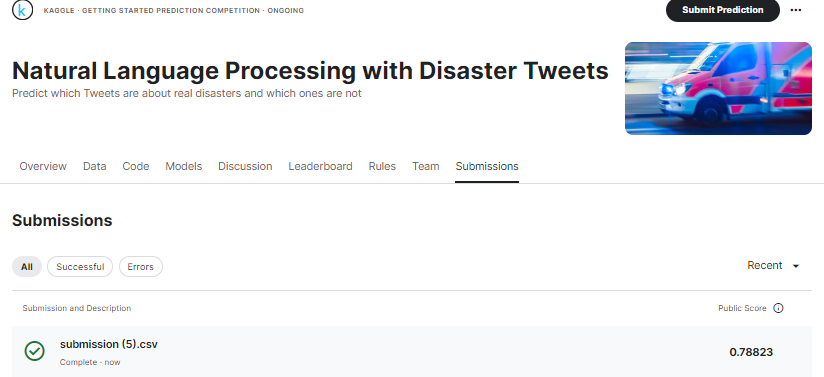

# Introduction

# Natural Language Processing (NLP) is a machine learning technique to automate the process of extracting sentiment or lingustic information from the semantic analysis. In this study, the text corpora split from the tweets will be fed into a Keras neural network that can be trained to identify if the specific tweets belong to the disaster classifcation. If so, then the disaster could be reported and broadcasted to the public.

In [139]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')

In [140]:
train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


# Binary Classification between with or without disaters

In [141]:
train['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

In [142]:
train['keyword'].value_counts()

keyword
fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: count, Length: 221, dtype: int64

# Data Cleaning: we may consider dropping attribute "location" weakly correlated to the disaster occurrence 

In [144]:
train['location'].value_counts()

location
USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: count, Length: 3341, dtype: int64

In [145]:
train.drop(['location'], axis=1, inplace=True)

# Top 20 Keywords

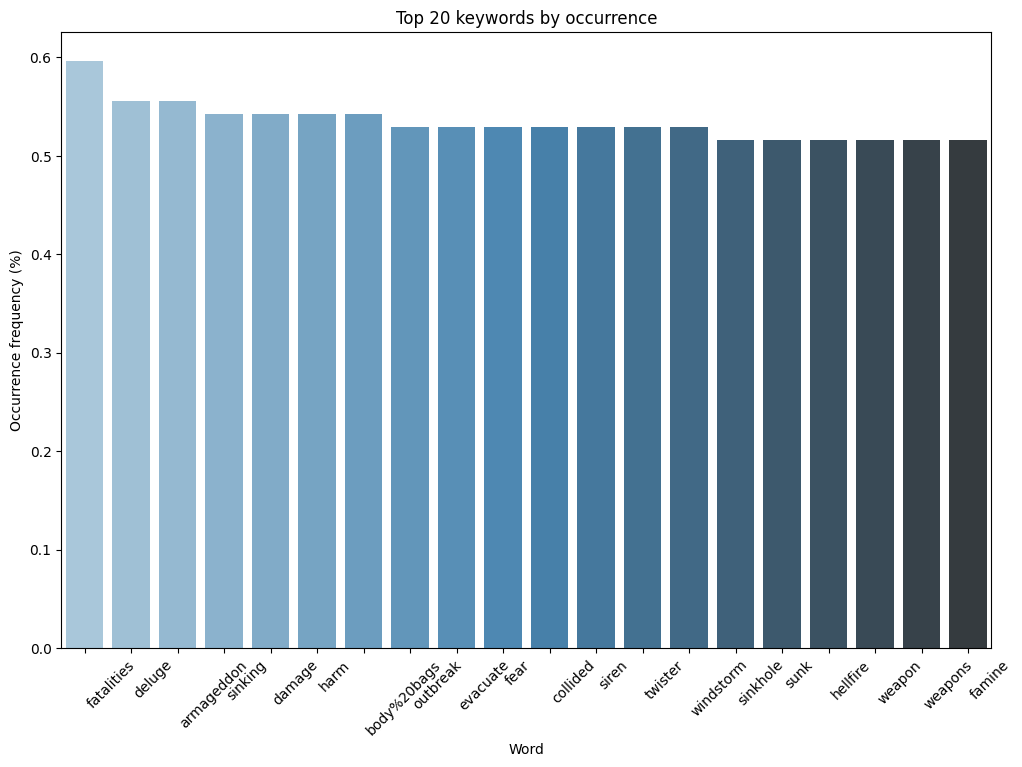

In [146]:
top_keyword_counts = train['keyword'].explode().value_counts(normalize=True).mul(100).head(20)
#word_counts = train['cleaned_Text'].explode()
#top_word_counts = word_counts[:20]


plt.figure(figsize=(12, 8))

sns.barplot(x=top_keyword_counts.index, y=top_keyword_counts.values,palette="Blues_d")

plt.title('Top 20 keywords by occurrence')
plt.xlabel('Word')
plt.ylabel('Occurrence frequency (%)')

plt.xticks(rotation=45, ha='left')
plt.show()

# Remove the keywords

In [147]:
train.drop(['keyword'], axis=1, inplace=True)

# Inspect the train data after cleaning operations.

In [148]:
train.head(5)

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


# By inspecting the classification labels, we can conclude that the train data is slightly unbalanced. Since the train data is already small in size and NLP would require more samples to achieve semantic accuracy, we are inclined to utilize all the train data.

In [149]:
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

In [150]:
import string

def clean_tokens(text):
    """
    Input: text
    Output: tokens
    """
    # Lowercase for case-insensitive analysis
    text = text.lower()

    # Remove punctuation except for apostrophes
    punctuation = string.punctuation.replace("'", "")
    for char in punctuation:
        text = text.replace(char, "")

    # Tokenize by splitting on spaces, commas, and periods
    tokens = text.split()
    tokens = [token for token in tokens if token]  # Remove empty tokens


    return tokens

In [151]:
train['stopword_text'] = train['text'].apply(clean_tokens)
train['stopword_text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, 'shelter, in, plac...
3    [13000, people, receive, wildfires, evacuation...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: stopword_text, dtype: object

# Before Stopword Removal

# Frequently appeared stopwords can be distracting and provide no useful information to identify disasters. We will remove the stopwords.

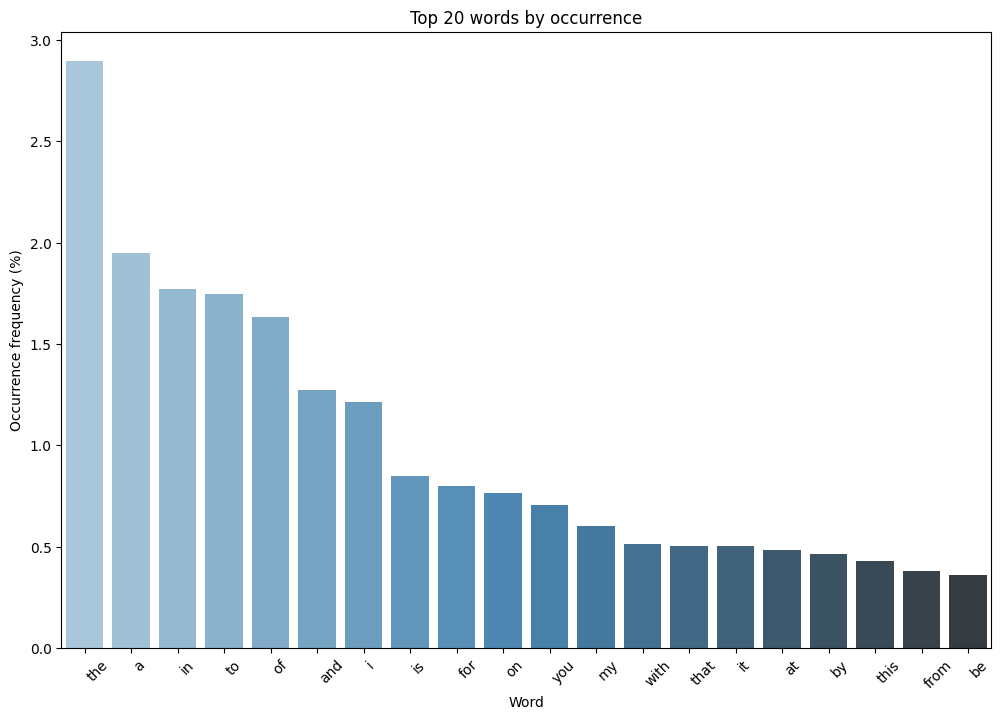

In [152]:
top_word_counts = train['stopword_text'].explode().value_counts(normalize=True).mul(100).head(20)
#word_counts = train['cleaned_Text'].explode()
#top_word_counts = word_counts[:20]


plt.figure(figsize=(12, 8))

sns.barplot(x=top_word_counts.index, y=top_word_counts.values,palette="Blues_d")

plt.title('Top 20 words by occurrence')
plt.xlabel('Word')
plt.ylabel('Occurrence frequency (%)')

plt.xticks(rotation=45, ha='left')
plt.show()

In [153]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords') 

# Create a set of stop words 
stop_words = stopwords.words('english') 

# Define a function to remove stop words from a sentence 
def remove_stop_words(text):
    # Lowercase for case-insensitive analysis
    text = text.lower()

    # Remove punctuation except for apostrophes
    punctuation = string.punctuation.replace("'", "")
    for char in punctuation:
        text = text.replace(char, "")
    
    # Split the sentence into individual words 
    words = text.split() 
  
    # Use a list comprehension to remove stop words 
    filtered_words = [word for word in words if word not in stop_words] 
  
    # Join the filtered words back into a sentence 
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [154]:
train['cleaned_text'] = train['text'].apply(remove_stop_words)
train['cleaned_text'].head()

0         deeds reason earthquake may allah forgive us
1                forest fire near la ronge sask canada
2    residents asked 'shelter place' notified offic...
3    13000 people receive wildfires evacuation orde...
4    got sent photo ruby alaska smoke wildfires pou...
Name: cleaned_text, dtype: object

In [155]:
#train['cleaned_text'] = train['text_no_stopwords'].apply(clean_tokens)
#train['cleaned_text'].tolist().head()
def split_text(text):
    return text.split()
train['cleaned_text_list'] = train['cleaned_text'].apply(split_text)
train['cleaned_text_list'].head()

0    [deeds, reason, earthquake, may, allah, forgiv...
1        [forest, fire, near, la, ronge, sask, canada]
2    [residents, asked, 'shelter, place', notified,...
3    [13000, people, receive, wildfires, evacuation...
4    [got, sent, photo, ruby, alaska, smoke, wildfi...
Name: cleaned_text_list, dtype: object

# After Stopword Removal

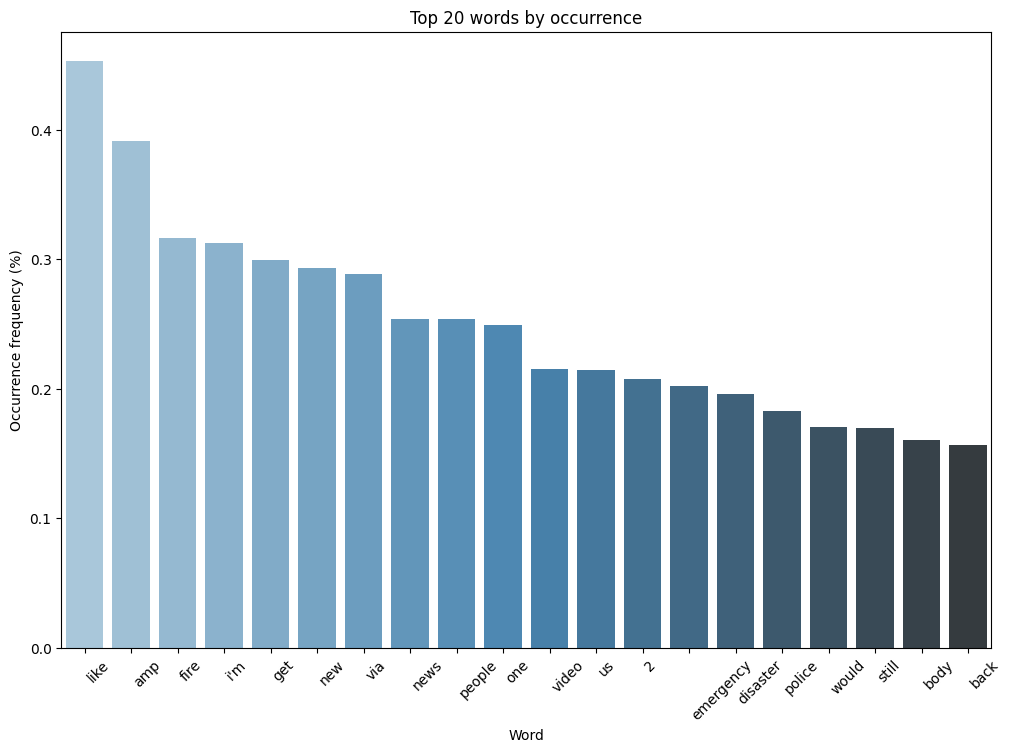

In [156]:
top_words = train['cleaned_text_list'].explode().value_counts(normalize=True).mul(100).head(20)

plt.figure(figsize=(12, 8))

sns.barplot(x=top_words.index, y=top_words.values,palette="Blues_d")

plt.title('Top 20 words by occurrence')
plt.xlabel('Word')
plt.ylabel('Occurrence frequency (%)')

plt.xticks(rotation=45, ha='left')
plt.show()

In [157]:
from sklearn.utils import shuffle

train = shuffle(train,random_state = 42).reset_index(drop = True)
y = np.array(train["target"].tolist())

In [164]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text


#EMBED_MODEL = "https://tfhub.dev/google/nnlm-en-dim50/2"
EMBED_MODEL = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim128/1"

embed = hub.load(EMBED_MODEL)


In [165]:
text_embed = embed(train.cleaned_text.to_list())
#print(text_embed)

In [166]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout

dropout_rate = 0.6

text_input = Input(shape=(text_embed.shape[1],))


text_model = Flatten()(text_input)
text_model = Dense(512,activation = 'relu')(text_model)
text_model = Dropout(dropout_rate)(text_model)
text_model = Dense(1024,activation = 'relu')(text_model)
text_model = Dropout(dropout_rate)(text_model)
text_model = Dense(2048,activation = 'relu')(text_model)
text_model = Dropout(dropout_rate)(text_model)
final = Dense(1,activation = 'sigmoid')(text_model)

final = Model(inputs = text_input,outputs = final)

In [167]:
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
learning_rate = 0.0001
opt = Nadam(learning_rate = learning_rate)

epochs = 100

final.compile(loss='binary_crossentropy',optimizer = opt,metrics=['accuracy'])

# set mode to be "min" to minimize the loss, patience = 20 to tolerate 20 epochs without improvement
earlystopping = EarlyStopping(monitor='val_loss',min_delta = 0.0003,mode='min',patience = 20, verbose = 1)

history = final.fit(x=text_embed,y=y,batch_size = 32,epochs=epochs,validation_split=0.15,callbacks=[earlystopping])
#out_df = final.predict()

Epoch 1/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5805 - loss: 0.6713 - val_accuracy: 0.7443 - val_loss: 0.5553
Epoch 2/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7447 - loss: 0.5393 - val_accuracy: 0.7408 - val_loss: 0.5261
Epoch 3/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7674 - loss: 0.4991 - val_accuracy: 0.7452 - val_loss: 0.5304
Epoch 4/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7822 - loss: 0.4676 - val_accuracy: 0.7601 - val_loss: 0.5071
Epoch 5/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.7764 - loss: 0.4871 - val_accuracy: 0.7653 - val_loss: 0.5107
Epoch 6/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.7853 - loss: 0.4610 - val_accuracy: 0.7636 - val_loss: 0.5091
Epoch 7/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.7987 - loss: 0.4572 - val_accuracy: 0.7758 - val_loss: 0.5037
Epoch 8/100
203/203 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7911 - loss: 0.4578 -

In [168]:
test = pd.read_csv('../input/nlp-getting-started/test.csv')

In [169]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [170]:
test['cleaned_text'] = test['text'].apply(remove_stop_words)

In [171]:
test_text_embed = embed(test.cleaned_text.to_list())

In [172]:
test['raw_prediction']=final.predict(test_text_embed)

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [173]:
test['target'] = test['raw_prediction'].apply(round)

In [174]:
out_df = test[['id','target']] 

In [175]:
out_df.to_csv('submission.csv',header=True, index=False)

# Summary

# Submission to the competition reflects a 78% accuracy. For a train data as small as 7000+ tweets, this should be considered a good performance for a complicated subject under study like languages. Adding more tweets into the train data may boost the accuracy at the cost of longer time to load and train. In this study, stopwords are removed to better highlight the disaster semantics. Developing an alternative way to sort out the disaster keywords more effecitively could be a possible solution. The endeavor could be an endless pursuit in the field of NLP research. The author sincerely appreciate the opportunity to conduct this inspiring deep learning study.